# Full Experiment Results Optimization Results

To effectively decide which parameters to use on our models, we have to evaluate the HPO results on the GoEmotions dataset.

In [1]:
import glob
import json
import pandas as pd

pd.options.display.max_rows = 1000

results = []
paths = glob.glob('../output/Vent/replica-fractions-with-test/*.json', recursive=True)
for path in paths:
    with open(path) as fp:
        result_dict = json.load(fp)
        result_tuple = (path, result_dict)
        results.append(result_tuple)

results_df = pd.DataFrame(results, columns=['Path', 'Dict'])

In [2]:
EXPERIMENT_METRICS = ['macro_f1', 'micro_f1']
EXPERIMENT_COLUMNS = ['Dataset', 'ModelType', 'Experiment']
INTERNAL_METRICS = ['precision', 'recall']
WEIGHT_FIELD = 'support'


def parse_path(path):
    dataset, model_type, experiment = path.split('/')[-3:]
    experiment = experiment.split('.')[0]
    return dataset, model_type, experiment


def build_experiment_columns(dataframe):
    path_parts = [parse_path(path) for path in dataframe.Path]
    for i, col in enumerate(EXPERIMENT_COLUMNS):
        dataframe[col] = [parts[i] for parts in path_parts]
    return dataframe


def extract_macro_stats(dataframe, metrics=EXPERIMENT_METRICS):
    try:
        split_names = dataframe['Dict'][0]['config']['data_config']['split_names']
    except IndexError:
        split_names = ['train', 'valid', 'test']
    for split in split_names:
        for metric in metrics:
            new_col_name = '{}_{}'.format(split, metric)
            dataframe[new_col_name] = [exp_dict['results'][split][metric] for exp_dict in dataframe['Dict']]
    return dataframe


def extract_category_stats(dataframe, metrics=INTERNAL_METRICS, weight_field=WEIGHT_FIELD):
    try:
        split_names = dataframe['Dict'][0]['config']['data_config']['split_names']
    except IndexError:
        split_names = ['train', 'valid', 'test']
    for split in split_names:
        for metric in metrics:
            new_col_name = '{}_{}'.format(split, metric)
            metric_dict = []
            for exp_dict in dataframe['Dict']:
                label_values = list(exp_dict['results'][split]['labels'].values())
                global_weight = sum(label_results[weight_field] for label_results in label_values)
                metric_score = sum(label_results[weight_field] * label_results[metric] / global_weight
                                   for label_results in label_values)
                metric_dict.append(metric_score)
            dataframe[new_col_name] = metric_dict
    return dataframe


def extract_model_details(dataframe):
    dataframe['Extractor'] = [exp_dict['config']['extractor_config']['ex_type'] for exp_dict in dataframe['Dict']]
    dataframe['Model'] = [exp_dict['config']['model_config']['model_name'] for exp_dict in dataframe['Dict']]
    return dataframe


def parse_df(dataframe):
    dataframe = build_experiment_columns(dataframe)
    dataframe = extract_model_details(dataframe)
    dataframe = extract_macro_stats(dataframe)
    dataframe = extract_category_stats(dataframe)
    return dataframe


In [3]:
parsed_df = parse_df(results_df)

parsed_df.sort_values('valid_macro_f1')

,Path,Dict,Dataset,ModelType,Experiment,Extractor,Model,train_macro_f1,train_micro_f1,valid_macro_f1,valid_micro_f1,test_macro_f1,test_micro_f1,train_precision,train_recall,valid_precision,valid_recall,test_precision,test_recall
288,../output/Vent/replica-fractions-with-test/89a...,{'config': {'data_config': {'raw_path': 'prepr...,Vent,replica-fractions-with-test,89a5fdad2426a06688da1d8aaf421701,fasttext,dnnpool,0.017636,0.030075,0.016840,0.031353,0.018176,0.032292,0.018164,0.667753,0.018455,0.617188,0.020165,0.682583
214,../output/Vent/replica-fractions-with-test/7dd...,{'config': {'data_config': {'raw_path': 'prepr...,Vent,replica-fractions-with-test,7dd835eb82433f1a5d6aa47f80faae7f,fasttext,dnnpool,0.018884,0.031018,0.018704,0.031151,0.019195,0.032364,0.017210,0.706341,0.017329,0.649677,0.018589,0.686943
314,../output/Vent/replica-fractions-with-test/7d4...,{'config': {'data_config': {'raw_path': 'prepr...,Vent,replica-fractions-with-test,7d4d4cf0d9e2908442f0866e3c4fb84b,tfidf,random,0.021990,0.034257,0.022004,0.035312,0.022075,0.036166,0.017669,0.716748,0.018261,0.703652,0.018733,0.690379
247,../output/Vent/replica-fractions-with-test/cb4...,{'config': {'data_config': {'raw_path': 'prepr...,Vent,replica-fractions-with-test,cb408bb7cde0cf9f088cddde43eee491,tfidf,random,0.021950,0.034235,0.022049,0.035323,0.022162,0.036171,0.017661,0.764438,0.018313,0.642295,0.018722,0.674168
352,../output/Vent/replica-fractions-with-test/941...,{'config': {'data_config': {'raw_path': 'prepr...,Vent,replica-fractions-with-test,941ce8c5c79331592cf41856351a35ab,tfidf,random,0.022042,0.034289,0.022074,0.035307,0.022064,0.036098,0.017658,0.759812,0.018258,0.682600,0.018699,0.684379
168,../output/Vent/replica-fractions-with-test/ce9...,{'config': {'data_config': {'raw_path': 'prepr...,Vent,replica-fractions-with-test,ce92ab051aebb5a19d4d1ffa924a49f8,tfidf,random,0.021951,0.034246,0.022099,0.035359,0.022059,0.036130,0.017668,0.736854,0.018288,0.705554,0.018695,0.677144
73,../output/Vent/replica-fractions-with-test/73c...,{'config': {'data_config': {'raw_path': 'prepr...,Vent,replica-fractions-with-test,73c8a5dc25889d8c0447df74cb0da740,tfidf,random,0.021899,0.034206,0.022107,0.035346,0.022003,0.036141,0.017665,0.714344,0.018282,0.691682,0.018697,0.715310
223,../output/Vent/replica-fractions-with-test/f05...,{'config': {'data_config': {'raw_path': 'prepr...,Vent,replica-fractions-with-test,f05ffb145b7587c192b842502937eeaf,tfidf,random,0.021983,0.034243,0.022150,0.035421,0.021980,0.036091,0.017680,0.694560,0.018333,0.688197,0.018697,0.715368
142,../output/Vent/replica-fractions-with-test/aa5...,{'config': {'data_config': {'raw_path': 'prepr...,Vent,replica-fractions-with-test,aa5ea7f9da5a12f839c454a309a46dea,tfidf,random,0.022023,0.034293,0.022161,0.035402,0.022033,0.036136,0.017661,0.724612,0.018339,0.664385,0.018706,0.701397
207,../output/Vent/replica-fractions-with-test/5c4...,{'config': {'data_config': {'raw_path': 'prepr...,Vent,replica-fractions-with-test,5c4dd0e8af76deea43ae30ba8487fcaf,tfidf,random,0.021979,0.034207,0.022205,0.035429,0.022054,0.036117,0.017674,0.721791,0.018335,0.720179,0.018723,0.670239


In [4]:
results_df = parsed_df
results_df['DataSource'] = [val['config']['data_config']['cache_path'].split('/')[-2] for val in results_df.Dict]
results_df['Seed'] = [val['config']['seed'] for val in results_df.Dict]
results_df = results_df[results_df.Seed < 5]

final_df = results_df[['Dict', 'Seed', 'DataSource', 'Dataset', 'ModelType', 'Extractor', 'Model', 'test_macro_f1', 'test_micro_f1', 'test_precision', 'test_recall']].round(2)
final_df = final_df.sort_values(['DataSource', 'Extractor', 'Model', 'Seed'])
final_df

,Dict,Seed,DataSource,Dataset,ModelType,Extractor,Model,test_macro_f1,test_micro_f1,test_precision,test_recall
95,{'config': {'data_config': {'raw_path': 'prepr...,0,vent-split-robust-cache-10-pct-with-test,Vent,replica-fractions-with-test,bert,dnnpool,0.15,0.17,0.14,0.23
19,{'config': {'data_config': {'raw_path': 'prepr...,1,vent-split-robust-cache-10-pct-with-test,Vent,replica-fractions-with-test,bert,dnnpool,0.15,0.17,0.14,0.23
353,{'config': {'data_config': {'raw_path': 'prepr...,2,vent-split-robust-cache-10-pct-with-test,Vent,replica-fractions-with-test,bert,dnnpool,0.14,0.17,0.14,0.23
36,{'config': {'data_config': {'raw_path': 'prepr...,3,vent-split-robust-cache-10-pct-with-test,Vent,replica-fractions-with-test,bert,dnnpool,0.15,0.17,0.14,0.23
331,{'config': {'data_config': {'raw_path': 'prepr...,4,vent-split-robust-cache-10-pct-with-test,Vent,replica-fractions-with-test,bert,dnnpool,0.15,0.17,0.14,0.23
362,{'config': {'data_config': {'raw_path': 'prepr...,0,vent-split-robust-cache-10-pct-with-test,Vent,replica-fractions-with-test,bert,lstm,0.17,0.19,0.16,0.25
16,{'config': {'data_config': {'raw_path': 'prepr...,1,vent-split-robust-cache-10-pct-with-test,Vent,replica-fractions-with-test,bert,lstm,0.15,0.17,0.14,0.24
8,{'config': {'data_config': {'raw_path': 'prepr...,2,vent-split-robust-cache-10-pct-with-test,Vent,replica-fractions-with-test,bert,lstm,0.17,0.19,0.17,0.24
9,{'config': {'data_config': {'raw_path': 'prepr...,3,vent-split-robust-cache-10-pct-with-test,Vent,replica-fractions-with-test,bert,lstm,0.16,0.19,0.16,0.25
300,{'config': {'data_config': {'raw_path': 'prepr...,4,vent-split-robust-cache-10-pct-with-test,Vent,replica-fractions-with-test,bert,lstm,0.17,0.19,0.17,0.24


In [13]:
results_df = final_df.drop(['Seed'], axis='columns').groupby(['DataSource', 'Extractor', 'Model']).agg(['mean', 'std', 'min', 'max']).reset_index()
results_df

DataSource Extractor       Model  \
                                                                      
0    vent-split-robust-cache-10-pct-with-test      bert     dnnpool   
1    vent-split-robust-cache-10-pct-with-test      bert        lstm   
2    vent-split-robust-cache-10-pct-with-test       bow  naivebayes   
3    vent-split-robust-cache-10-pct-with-test       bow          rf   
4    vent-split-robust-cache-10-pct-with-test       bow         sgd   
5    vent-split-robust-cache-10-pct-with-test  fasttext     dnnpool   
6    vent-split-robust-cache-10-pct-with-test  fasttext        lstm   
7    vent-split-robust-cache-10-pct-with-test     tfidf  naivebayes   
8    vent-split-robust-cache-10-pct-with-test     tfidf      random   
9    vent-split-robust-cache-10-pct-with-test     tfidf          rf   
10   vent-split-robust-cache-10-pct-with-test     tfidf         sgd   
11  vent-split-robust-cache-100-pct-with-test      bert     dnnpool   
12  vent-split-robust-cache-100-pct-with-test      bert        lstm   
13  vent-split-robust-cache-100-pct-with-test       bow  naivebayes   
14  vent-split-robust-cache-100-pct-with-test       bow          rf   
15  vent-split-robust-cache-100-pct-with-test       bow         sgd   
16  vent-split-robust-cache-100-pct-with-test  fasttext     dnnpool   
17  vent-split-robust-cache-100-pct-with-test  fasttext        lstm   
18  vent-split-robust-cache-100-pct-with-test     tfidf  naivebayes   
19  vent-split-robust-cache-100-pct-with-test     tfidf      random   
20  vent-split-robust-cache-100-pct-with-test     tfidf          rf   
21  vent-split-robust-cache-100-pct-with-test     tfidf         sgd   
22   vent-split-robust-cache-20-pct-with-test      bert     dnnpool   
23   vent-split-robust-cache-20-pct-with-test      bert        lstm   
24   vent-split-robust-cache-20-pct-with-test       bow  naivebayes   
25   vent-split-robust-cache-20-pct-with-test       bow          rf   
26   vent-split-robust-cache-20-pct-with-test       bow         sgd   
27   vent-split-robust-cache-20-pct-with-test  fasttext     dnnpool   
28   vent-split-robust-cache-20-pct-with-test  fasttext        lstm   
29   vent-split-robust-cache-20-pct-with-test     tfidf  naivebayes   
30   vent-split-robust-cache-20-pct-with-test     tfidf      random   
31   vent-split-robust-cache-20-pct-with-test     tfidf          rf   
32   vent-split-robust-cache-20-pct-with-test     tfidf         sgd   
33   vent-split-robust-cache-40-pct-with-test      bert     dnnpool   
34   vent-split-robust-cache-40-pct-with-test      bert        lstm   
35   vent-split-robust-cache-40-pct-with-test       bow  naivebayes   
36   vent-split-robust-cache-40-pct-with-test       bow          rf   
37   vent-split-robust-cache-40-pct-with-test       bow         sgd   
38   vent-split-robust-cache-40-pct-with-test  fasttext     dnnpool   
39   vent-split-robust-cache-40-pct-with-test  fasttext        lstm   
40   vent-split-robust-cache-40-pct-with-test     tfidf  naivebayes   
41   vent-split-robust-cache-40-pct-with-test     tfidf      random   
42   vent-split-robust-cache-40-pct-with-test     tfidf          rf   
43   vent-split-robust-cache-40-pct-with-test     tfidf         sgd   
44    vent-split-robust-cache-5-pct-with-test      bert     dnnpool   
45    vent-split-robust-cache-5-pct-with-test      bert        lstm   
46    vent-split-robust-cache-5-pct-with-test       bow  naivebayes   
47    vent-split-robust-cache-5-pct-with-test       bow          rf   
48    vent-split-robust-cache-5-pct-with-test       bow         sgd   
49    vent-split-robust-cache-5-pct-with-test  fasttext     dnnpool   
50    vent-split-robust-cache-5-pct-with-test  fasttext        lstm   
51    vent-split-robust-cache-5-pct-with-test     tfidf  naivebayes   
52    vent-split-robust-cache-5-pct-with-test     tfidf      random   
53    vent-split-robust-cache-5-pct-with-test     tfidf          rf   
54    vent-split-robust-cache-5-pct-with-test     tfidf    

In [27]:
results_df[results_df.DataSource == 'vent-split-robust-cache-100-pct-with-test'].round(2)

DataSource Extractor       Model  \
                                                                      
11  vent-split-robust-cache-100-pct-with-test      bert     dnnpool   
12  vent-split-robust-cache-100-pct-with-test      bert        lstm   
13  vent-split-robust-cache-100-pct-with-test       bow  naivebayes   
14  vent-split-robust-cache-100-pct-with-test       bow          rf   
15  vent-split-robust-cache-100-pct-with-test       bow         sgd   
16  vent-split-robust-cache-100-pct-with-test  fasttext     dnnpool   
17  vent-split-robust-cache-100-pct-with-test  fasttext        lstm   
18  vent-split-robust-cache-100-pct-with-test     tfidf  naivebayes   
19  vent-split-robust-cache-100-pct-with-test     tfidf      random   
20  vent-split-robust-cache-100-pct-with-test     tfidf          rf   
21  vent-split-robust-cache-100-pct-with-test     tfidf         sgd   

   test_macro_f1                   test_micro_f1                    \
            mean   std   min   max          mean   std   min   max   
11          0.17  0.00  0.17  0.17          0.19  0.00  0.19  0.19   
12          0.19  0.00  0.19  0.19          0.21  0.00  0.21  0.21   
13          0.13  0.00  0.13  0.13          0.15  0.00  0.15  0.15   
14          0.11  0.00  0.11  0.11          0.13  0.00  0.13  0.13   
15          0.13  0.00  0.13  0.13          0.15  0.00  0.15  0.15   
16          0.08  0.06  0.02  0.13          0.10  0.07  0.04  0.16   
17          0.08  0.02  0.06  0.10          0.11  0.02  0.09  0.13   
18          0.14  0.00  0.14  0.14          0.16  0.00  0.16  0.16   
19          0.02  0.00  0.02  0.02          0.04  0.00  0.04  0.04   
20          0.11  0.00  0.11  0.11          0.13  0.00  0.13  0.13   
21          0.14  0.00  0.14  0.14          0.16  0.00  0.16  0.16   

   test_precision                   test_recall                    
             mean   std   min   max        mean   std   min   max  
11           0.16  0.00  0.16  0.16        0.24  0.00  0.24  0.25  
12           0.19  0.00  0.18  0.19        0.26  0.00  0.26  0.26  
13           0.12  0.00  0.12  0.12        0.23  0.00  0.23  0.23  
14           0.12  0.00  0.12  0.12        0.18  0.02  0.17  0.20  
15           0.12  0.00  0.12  0.12        0.20  0.00  0.20  0.20  
16           0.08  0.06  0.02  0.13        0.30  0.14  0.22  0.51  
17           0.08  0.02  0.06  0.10        0.21  0.01  0.20  0.22  
18           0.13  0.00  0.13  0.13        0.21  0.00  0.21  0.21  
19           0.02  0.00  0.02  0.02        0.69  0.02  0.67  0.72  
20           0.12  0.00  0.12  0.12        0.19  0.02  0.16  0.20  
21           0.14  0.00  0.14  0.14        0.21  0.00  0.21  0.21

In [14]:
fraction_results_df = results_df[results_df.DataSource != 'vent-split-robust-backwards-cache'].reset_index().drop(['index'], axis='columns')
fraction_results_df['Fraction'] = [100 if ds == 'vent-split-robust-cache' else int(ds.split('-')[-4]) 
                                       for ds in fraction_results_df.DataSource.tolist()]
complete_fraction_df = fraction_results_df.sort_values(['Fraction', 'Extractor', 'Model'])

/usr/local/lib/python3.8/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<ipython-input-31-021849f2e887>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  models_fraction_df['Label'] = [(row['Extractor'][0] + ' + ' + row['Model'][0]).upper() for _, row in models_fraction_df.iterrows()]


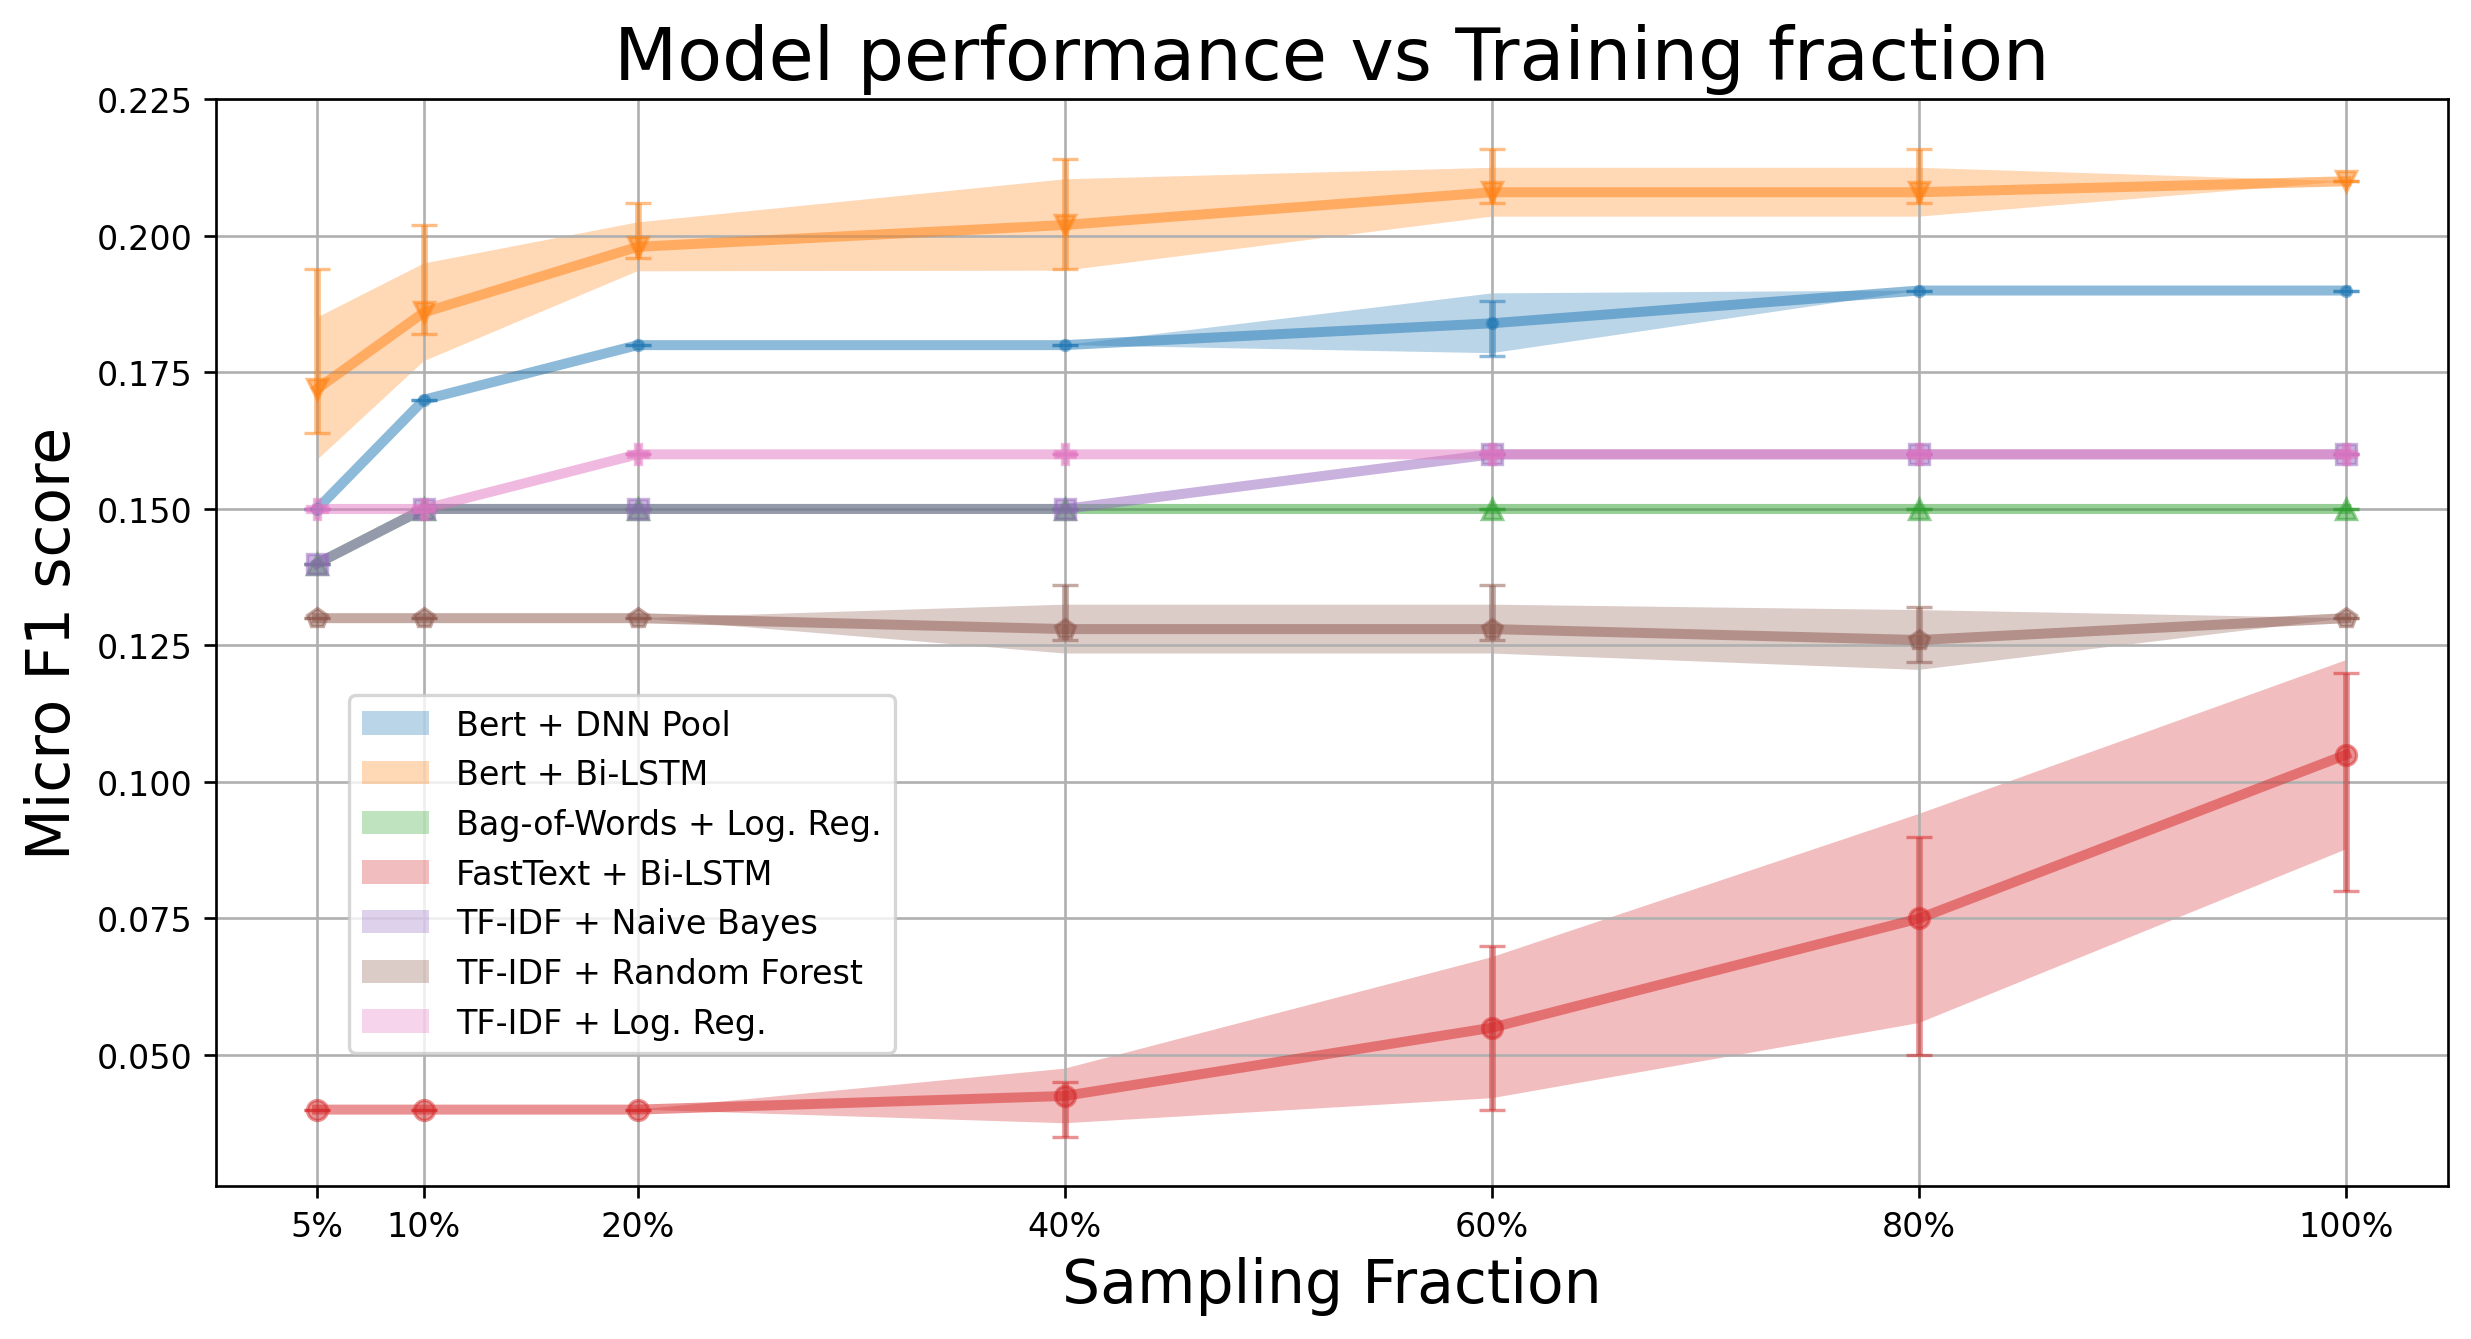

In [31]:
from functools import reduce
import matplotlib.pyplot as plt

models_to_keep = [('bert', 'lstm'),
                  ('bert', 'dnnpool'), 
                  ('fasttext', 'lstm'),
                  ('bow', 'sgd'), 
                  ('tfidf', 'rf'), 
                  ('tfidf', 'sgd'), 
                  ('tfidf', 'naivebayes')]
df_filters = [(complete_fraction_df['Extractor'] == ex) & (complete_fraction_df['Model'] == mod)
              for (ex, mod) in models_to_keep]
df_filter = reduce(lambda x, y: x | y, df_filters)

models_fraction_df = complete_fraction_df[df_filter]
models_fraction_df['Label'] = [(row['Extractor'][0] + ' + ' + row['Model'][0]).upper() for _, row in models_fraction_df.iterrows()]


plt.figure(figsize=(12, 6), dpi=240)
markers = ['.', 'v', '^', 'o', 's', 'p', 'P']
for i, (label, df) in enumerate(models_fraction_df.groupby('Label')):
    x = df.Fraction
    y = df.test_micro_f1['mean']
    delta = df.test_micro_f1['std']
    yerr = (df.test_micro_f1['min'] - y, y - df.test_micro_f1['max'])
    plt.errorbar(df.Fraction, df.test_micro_f1['mean'], yerr=yerr, label=label, elinewidth=2.0, capsize=4.0, linewidth=3.0, marker=markers[i], alpha=0.5)
    plt.fill_between(x, y-delta, y+delta, alpha=0.3)
plt.legend(['Bert + DNN Pool', 'Bert + Bi-LSTM', 'Bag-of-Words + Log. Reg.', 'FastText + Bi-LSTM', 'TF-IDF + Naive Bayes', 'TF-IDF + Random Forest', 'TF-IDF + Log. Reg.'], loc='lower left', borderaxespad=4.0)

fraction_ticks = models_fraction_df.Fraction.unique()
tick_labels = [f'{pct}%' for pct in fraction_ticks]
plt.xticks(fraction_ticks, tick_labels)
plt.xlabel('Sampling Fraction', fontsize=18)
plt.ylabel('Micro F1 score', fontsize=18)
plt.grid()
plt.title('Model performance vs Training fraction', fontsize=22)
plt.savefig('../output/VentModelPerformanceVsTrainingFraction.pdf')